<a href="https://colab.research.google.com/github/sophtsai/Heart-Disease-ML/blob/main/Preprocessing/ryanMLHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from collections import Counter

Mounted at /content/drive


In [4]:
key_ind = pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv')
key_ind

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [5]:
key_ind.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
print(sorted(Counter(key_ind['HeartDisease']).items()))

[('No', 292422), ('Yes', 27373)]


In [7]:
has_hd = key_ind[key_ind['HeartDisease'] == 'Yes']
has_nohd = key_ind[key_ind['HeartDisease'] == 'No']
#has_hd makes a table containing only those with heart disease, and has_nohd makes table with people without heart disease

In [8]:
print(has_hd.shape, has_nohd.shape, key_ind.shape)
#checking that they add up

(27373, 18) (292422, 18) (319795, 18)


In [9]:
X = key_ind
Y = key_ind['HeartDisease']

In [10]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from imblearn import under_sampling, over_sampling

In [12]:
from imblearn.over_sampling import RandomOverSampler
randomos = RandomOverSampler(random_state = 0)
oversampledX, oversampledY = randomos.fit_resample(X,Y)
print(oversampledX.shape, oversampledY.shape)
#I think oversampledX is the new dataset with all of it being oversampled

(584844, 18) (584844,)


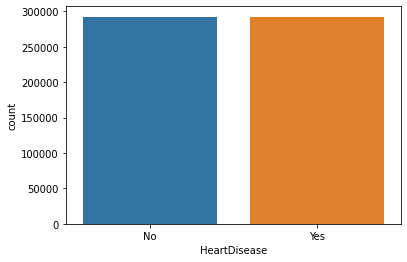

In [13]:
sns.countplot(x=oversampledX['HeartDisease'], data=oversampledY)

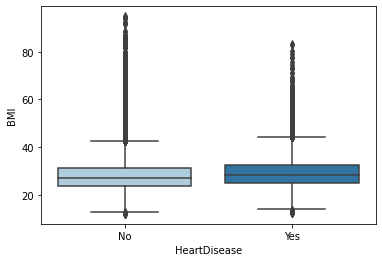

In [14]:
sns.set_palette("Paired")
ax = sns.boxplot(x="HeartDisease", y = "BMI", data=key_ind) #from the original dataset 
plt.show()

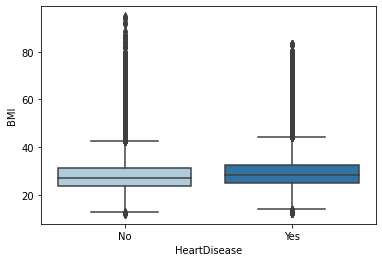

In [15]:
sns.set_palette("Paired")
ax = sns.boxplot(x="HeartDisease", y = "BMI", data=oversampledX) #from the oversampled dataset
plt.show()

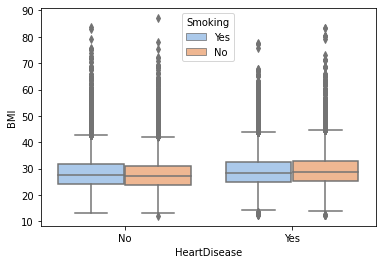

In [16]:
random_subset_from_oversample = oversampledX.sample(n=100000)
sns.set_palette("pastel")
ax = sns.boxplot(x="HeartDisease", y = "BMI", hue = "Smoking", data=random_subset_from_oversample)
plt.show()

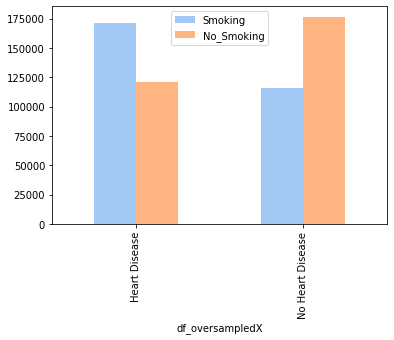

In [17]:
oversampledX_noHD = oversampledX[oversampledX['HeartDisease'] == 'No']
oversampledX_HD = oversampledX[oversampledX['HeartDisease'] == 'Yes']

noSmokingHD = oversampledX_HD['Smoking'].value_counts()['No']
smokingHD = oversampledX_HD['Smoking'].value_counts()['Yes']
noSmokingNoHD = oversampledX_noHD['Smoking'].value_counts()['No']
smokingNoHD = oversampledX_noHD['Smoking'].value_counts()['Yes']

df = pd.DataFrame({
    'df_oversampledX' : ["Heart Disease", "No Heart Disease"],
    'Smoking' : [smokingHD, smokingNoHD],
    'No_Smoking': [noSmokingHD, noSmokingNoHD],
})

df.plot(x= "df_oversampledX", y=["Smoking", "No_Smoking"], kind = "bar")

In [19]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(oversampledX, test_size=0.2, random_state=25)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")



No. of training examples: 467875
No. of testing examples: 116969


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
72544,No,21.11,Yes,No,No,10.0,2.0,No,Male,18-24,White,No,No,Fair,8.0,Yes,No,No
548158,Yes,23.78,Yes,No,No,3.0,10.0,No,Female,70-74,White,No,No,Fair,6.0,No,No,No
3045,No,39.75,Yes,No,No,21.0,0.0,No,Female,25-29,Black,No,Yes,Fair,7.0,Yes,No,No
460976,Yes,26.52,Yes,No,No,0.0,0.0,No,Male,55-59,Hispanic,Yes,Yes,Good,6.0,No,No,No
123416,No,34.33,No,No,No,0.0,3.0,No,Female,18-24,Black,No,Yes,Excellent,6.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516351,Yes,31.25,No,No,No,2.0,30.0,Yes,Female,50-54,Hispanic,No,Yes,Poor,3.0,No,No,No
130365,No,24.19,Yes,No,No,0.0,0.0,No,Female,65-69,White,Yes (during pregnancy),Yes,Very good,7.0,No,No,No
6618,No,24.41,Yes,No,No,0.0,3.0,No,Male,45-49,White,No,Yes,Good,6.0,No,No,No
90430,No,28.29,Yes,No,No,0.0,0.0,No,Female,60-64,White,No,Yes,Excellent,6.0,No,No,No
